# Blotto 12 Soldiers

In [1]:
from games.blotto import Blotto
import numpy as np
import matplotlib.pyplot as plt
from agents.random_agent import RandomAgent
from agents.fictitious_play import FictitiousPlay
from agents.regret_matching import RegretMatching
from utilities.utils import run_and_plot, plot_convergence_to_nash, plot_action_histogram, plot_action_trace_from_history
from utilities.utils import plot_dual_agent_simplex, compute_empirical_distributions

In [2]:
#initialize game
game = Blotto(12,3)
game.reset()

#print game information
agents = game.agents
moves = game._moves
num_action = game._num_actions
action_spaces = game.action_spaces
observation_spaces = game.observation_spaces 
print("Game Information:")
print("Agents:", agents)
print("Moves:", moves)
print("Number of Actions:", num_action)
print("Action Spaces:", action_spaces)
print("Observation Spaces:", observation_spaces)

Game Information:
Agents: ['agent_0', 'agent_1']
Moves: [[1, 1, 10], [1, 2, 9], [1, 3, 8], [1, 4, 7], [1, 5, 6], [2, 2, 8], [2, 3, 7], [2, 4, 6], [2, 5, 5], [3, 3, 6], [3, 4, 5], [4, 4, 4]]
Number of Actions: 12
Action Spaces: {'agent_0': Discrete(12), 'agent_1': Discrete(12)}
Observation Spaces: {'agent_0': typing.Dict[~AgentID, ~ActionType], 'agent_1': typing.Dict[~AgentID, ~ActionType]}


# Fictitious Play vs Fictitious Play

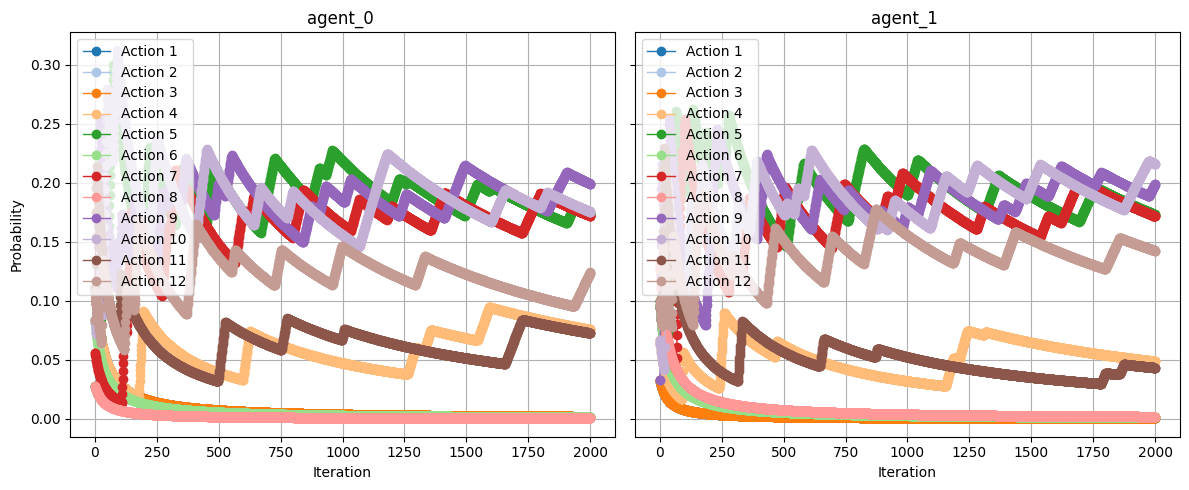

In [3]:
fp_agents = {agent: FictitiousPlay(game, agent, seed=20) for agent in agents}
policies, action_history = run_and_plot(fp_agents, game, num_iterations=2000, title_suffix="")

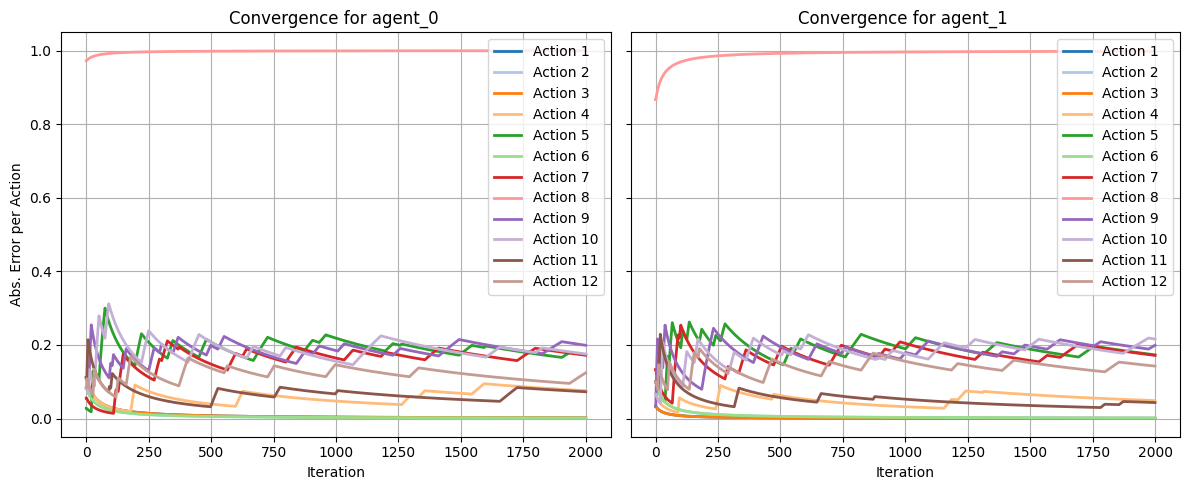

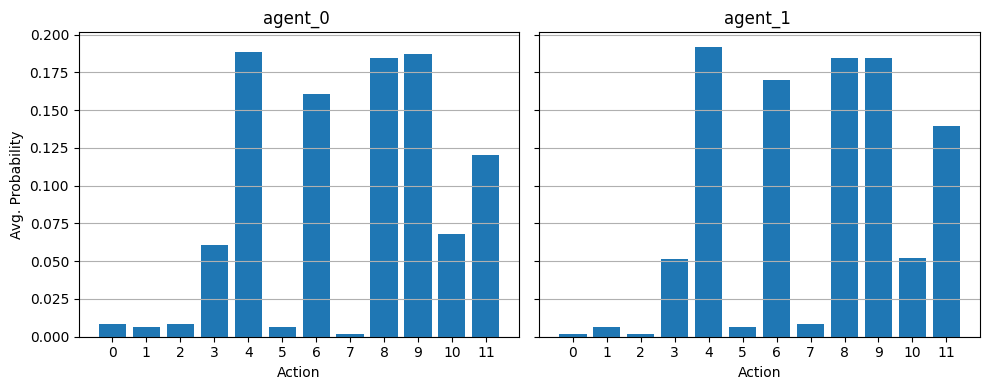

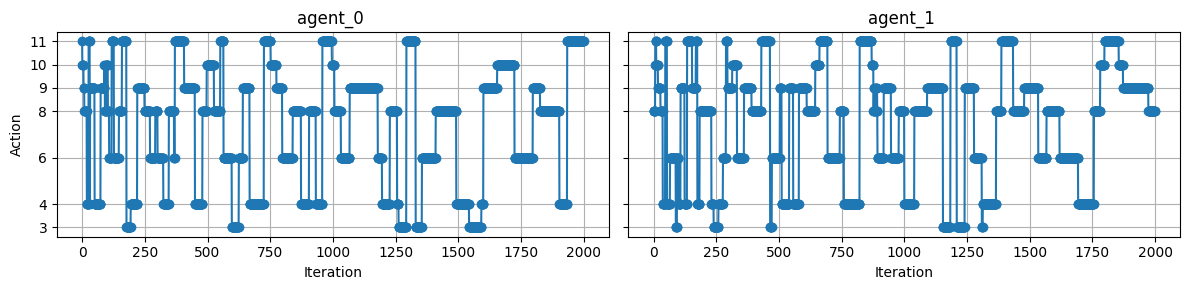

In [4]:

nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [5]:
for agent in fp_agents:
    print(agent, fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in fp_agents:
    action = get_action_from_policy(fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.0019656  0.0014742  0.0019656  0.07567568 0.17346437 0.0014742
 0.17199017 0.0004914  0.1990172  0.17542998 0.07272727 0.12432432]
agent_1 [0.00049285 0.00147856 0.00049285 0.04879251 0.17299162 0.00147856
 0.17151306 0.00197141 0.19911286 0.21586989 0.04337112 0.1424347 ]
Action with high probability for agent_0: [2, 5, 5]
Action with high probability for agent_1: [3, 3, 6]


# Regret Matching vs Regret Matching

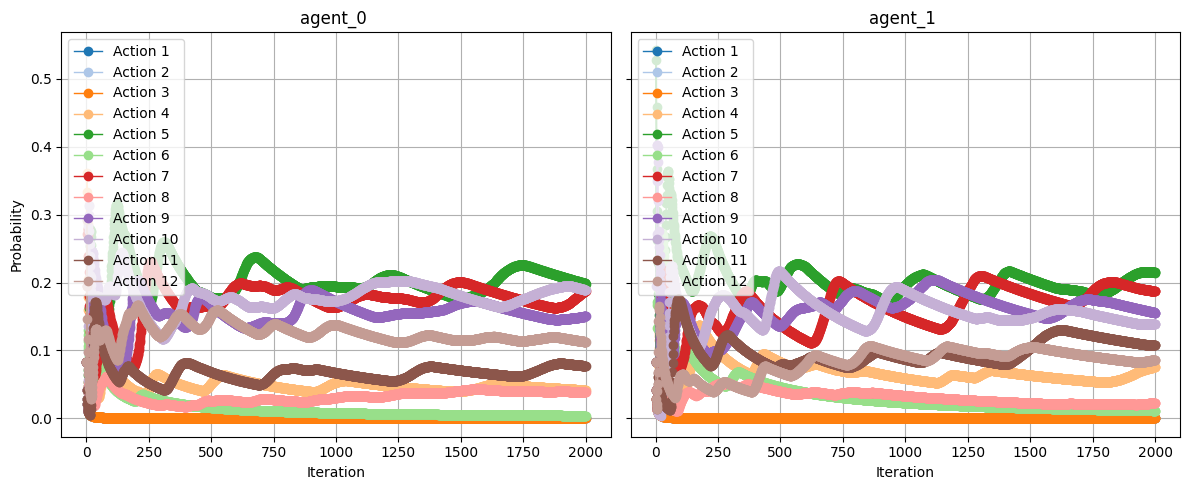

In [6]:
rm_agents = {agent: RegretMatching(game, agent, seed=1) for agent in agents}
policies, action_history = run_and_plot(rm_agents, game, num_iterations=2000, title_suffix="")

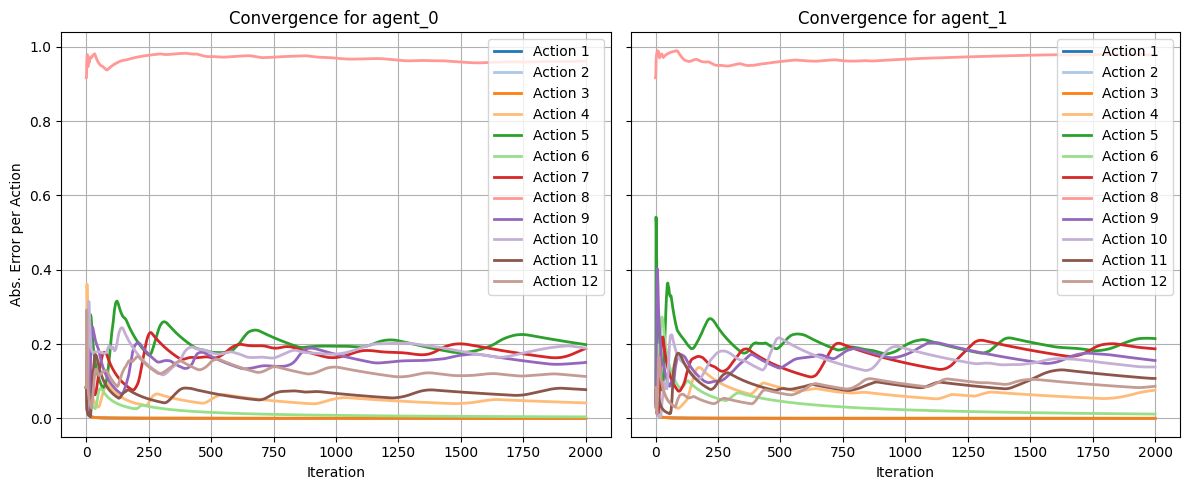

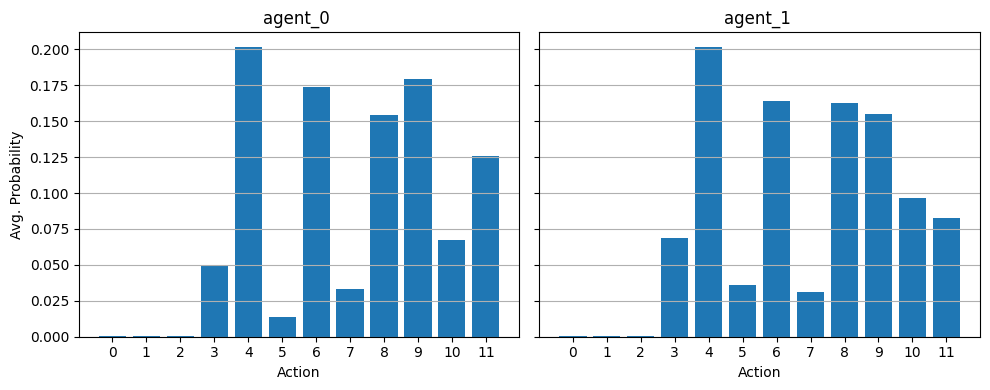

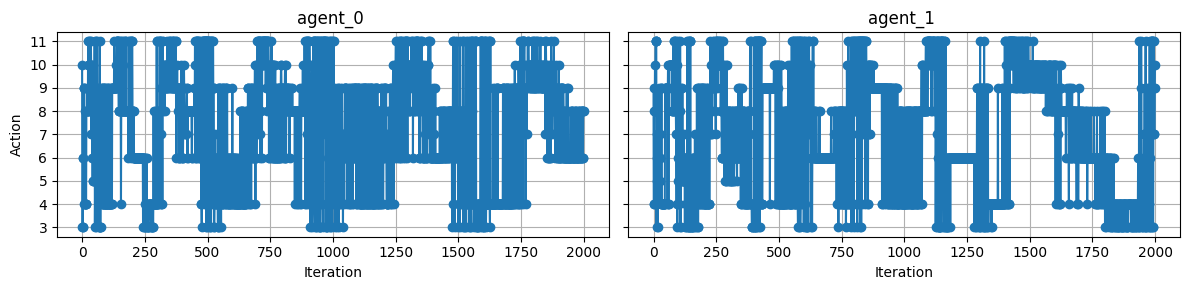

In [7]:
nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [8]:
for agent in rm_agents:
    print(agent, rm_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in rm_agents:
    action = get_action_from_policy(rm_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [4.16666667e-05 4.16666667e-05 4.16666667e-05 4.16135903e-02
 1.98499035e-01 4.00321808e-03 1.87847034e-01 3.82084257e-02
 1.50676590e-01 1.89038310e-01 7.72709642e-02 1.12717833e-01]
agent_1 [4.16666667e-05 4.16666667e-05 4.16666667e-05 7.57379785e-02
 2.14732099e-01 1.15104720e-02 1.87163366e-01 2.27825749e-02
 1.55658816e-01 1.38431598e-01 1.07411319e-01 8.64467775e-02]
Action with high probability for agent_0: [1, 5, 6]
Action with high probability for agent_1: [1, 5, 6]


# Fictitious Play vs Regret Matching

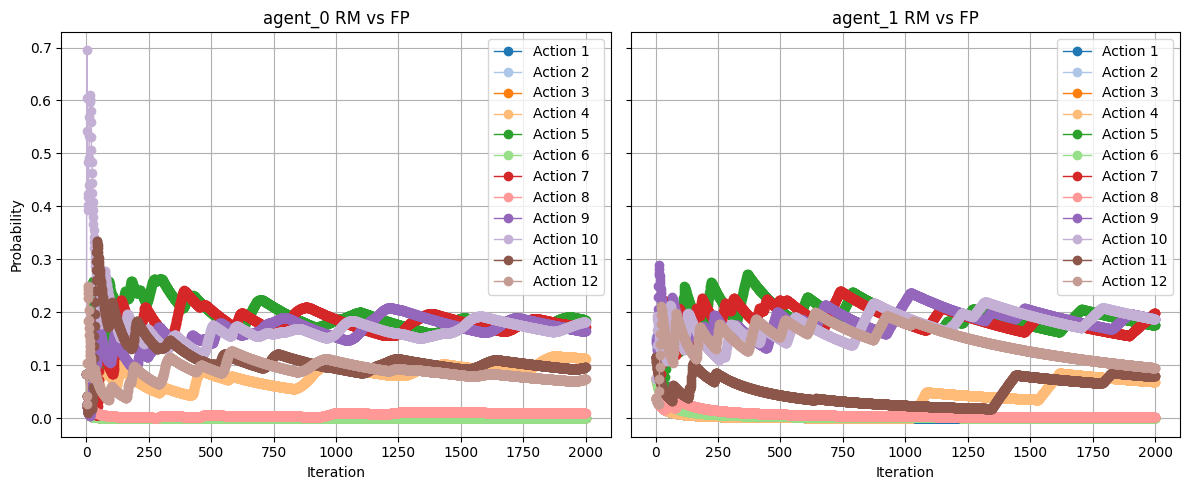

In [9]:
rm_vs_fp_agents = {agents[0]: RegretMatching(game=game, agent=agents[0], seed=1),
              agents[1]: FictitiousPlay(game=game, agent=agents[1], seed=1)}
policies, action_history = run_and_plot(rm_vs_fp_agents, game, num_iterations=2000, title_suffix="RM vs FP")

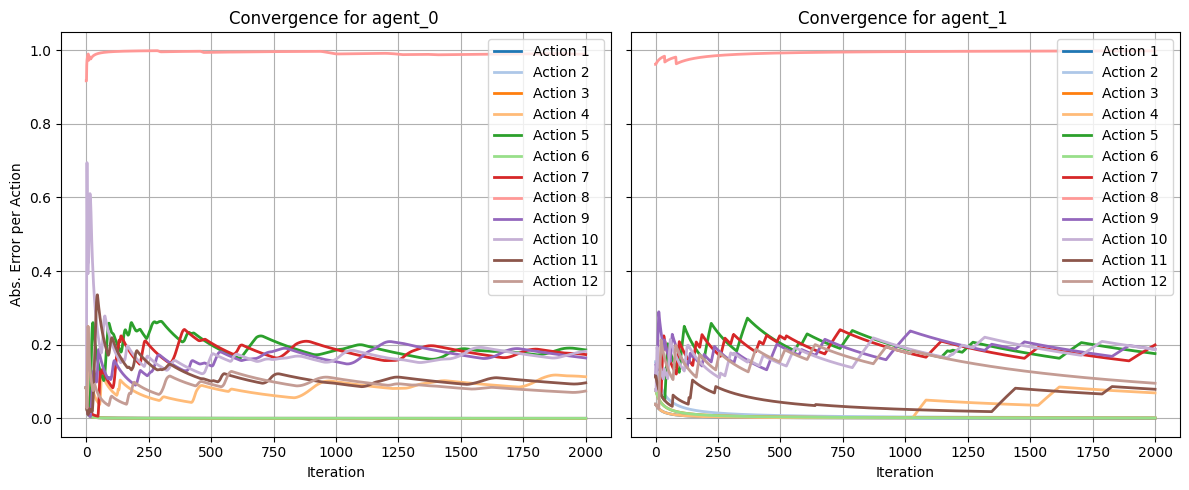

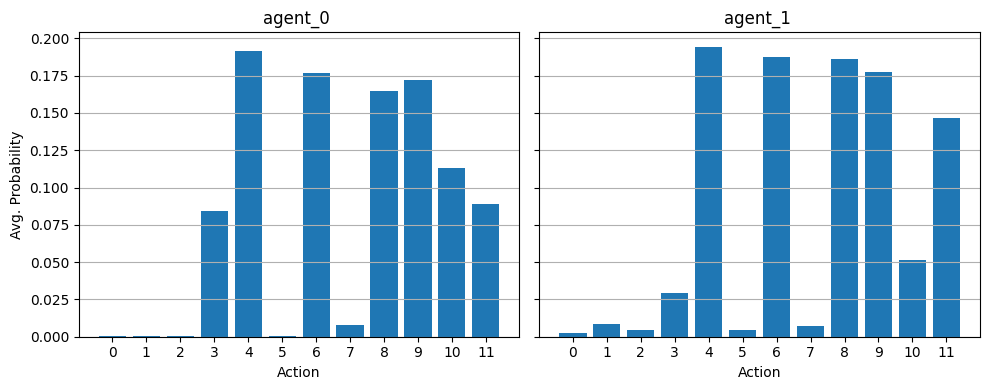

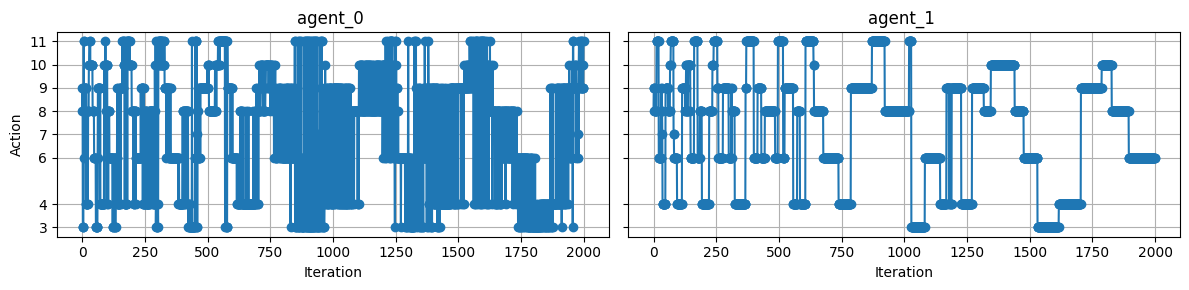

In [10]:
nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [11]:
for agent in rm_vs_fp_agents:
    print(agent, rm_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in rm_vs_fp_agents:
    action = get_action_from_policy(rm_vs_fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [4.16666667e-05 4.16666667e-05 4.16666667e-05 1.12910050e-01
 1.85813704e-01 4.16666667e-05 1.73244996e-01 1.08488902e-02
 1.63996241e-01 1.82201293e-01 9.65446604e-02 7.42734988e-02]
agent_1 [0.00049383 0.00197531 0.00098765 0.0691358  0.17580247 0.00098765
 0.19950617 0.00197531 0.18765432 0.18716049 0.07901235 0.09530864]
Action with high probability for agent_0: [1, 5, 6]
Action with high probability for agent_1: [2, 3, 7]


# Random Agent vs Random Agent

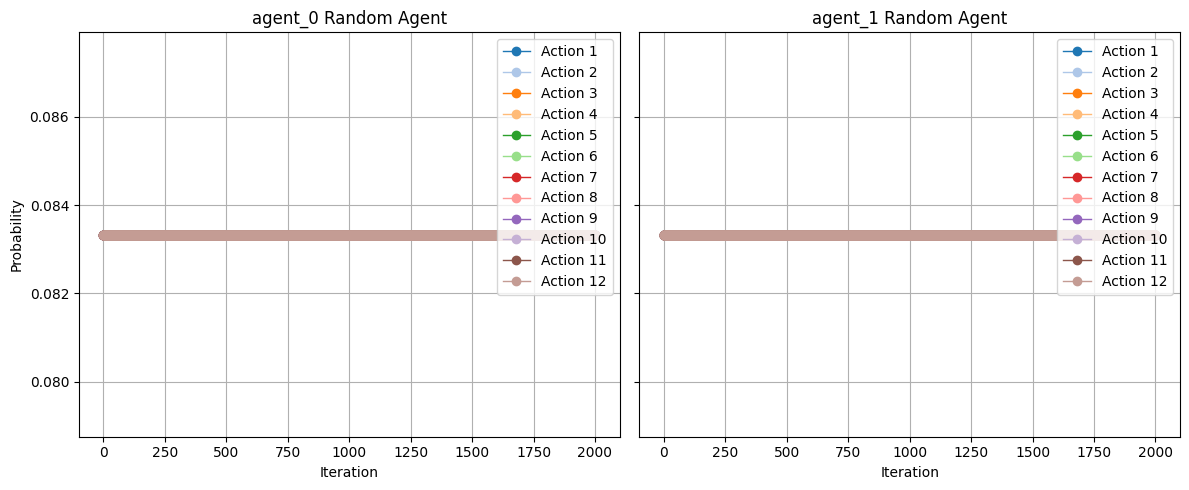

In [12]:
random_agents = {agent: RandomAgent(game, agent) for agent in agents}
policies, action_history = run_and_plot(random_agents, game, num_iterations=2000, title_suffix="Random Agent")

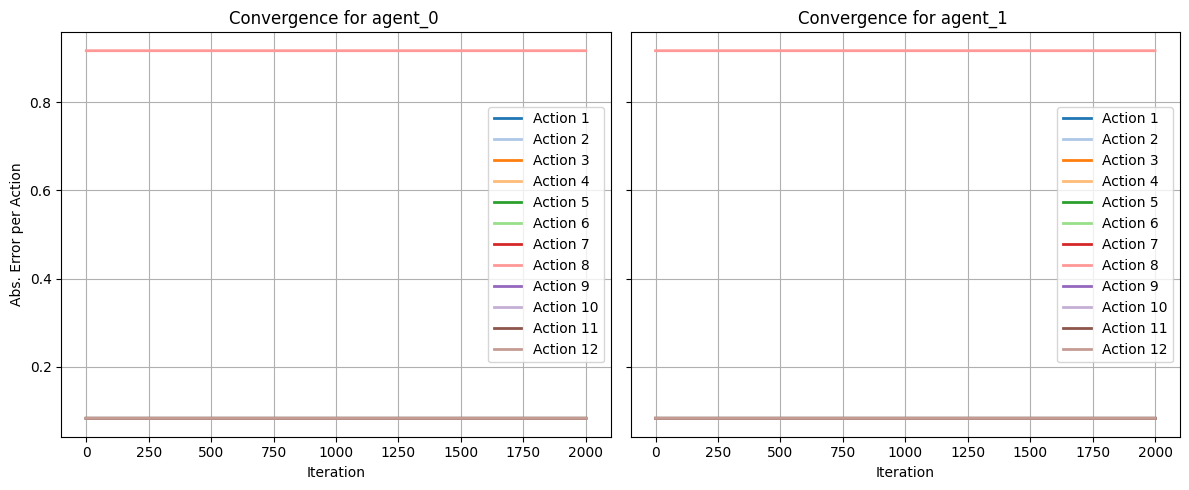

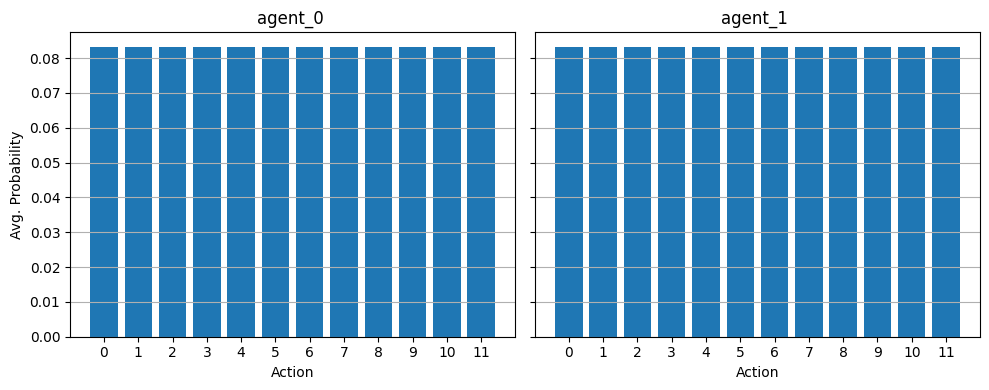

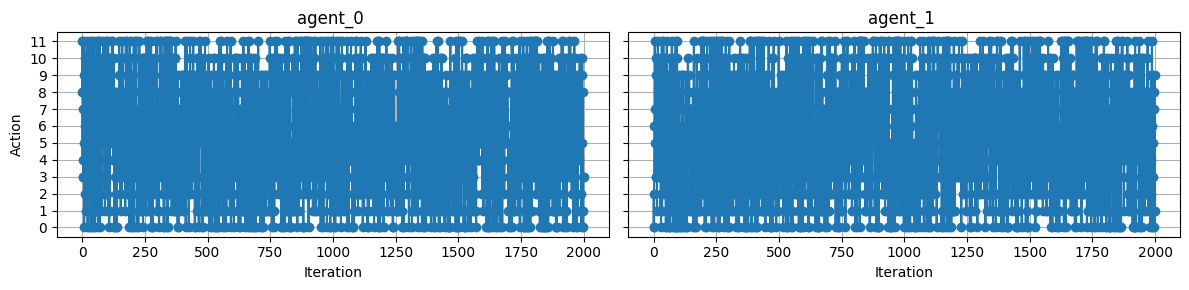

In [13]:
nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

# Random Agent vs Fictitious Play

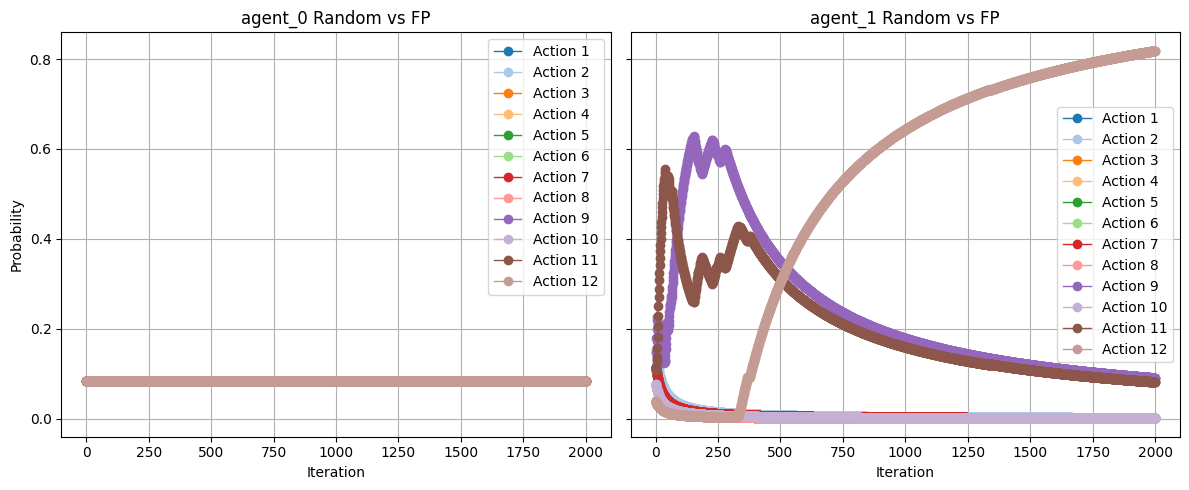

In [14]:
random_vs_fp_agents = {agents[0]: RandomAgent(game=game, agent=agents[0]),
                          agents[1]: FictitiousPlay(game=game, agent=agents[1], seed=1)}
policies, action_history = run_and_plot(random_vs_fp_agents, game, num_iterations=2000, title_suffix="Random vs FP")

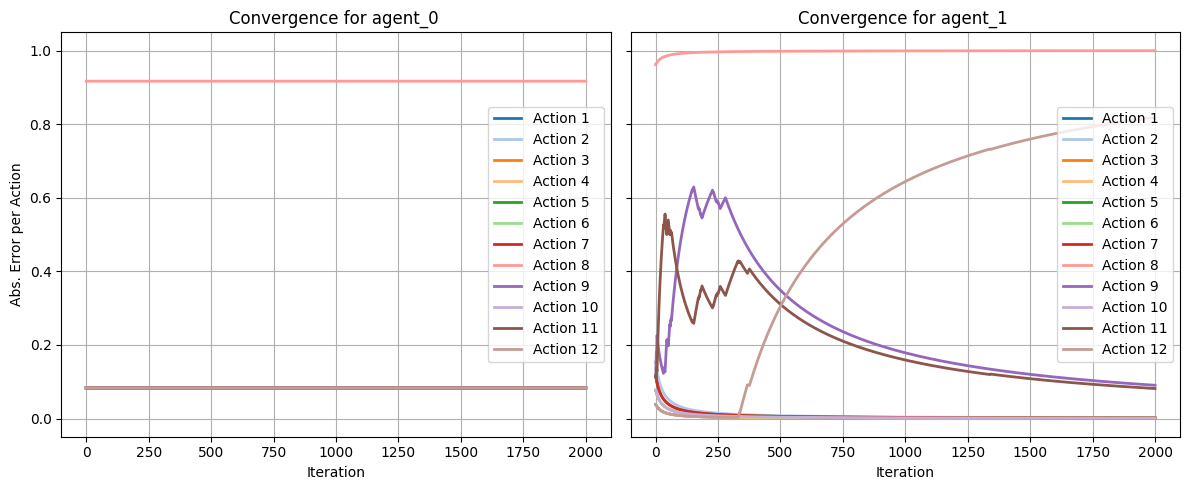

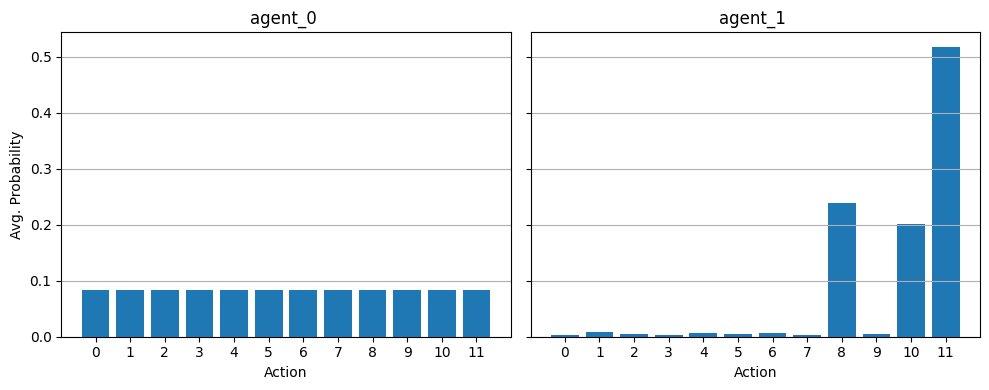

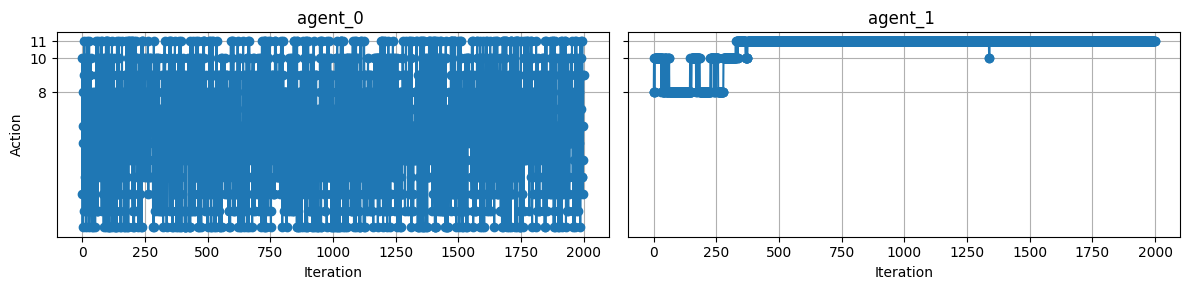

In [15]:
nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [16]:
for agent in random_vs_fp_agents:
    print(agent, random_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in random_vs_fp_agents:
    action = get_action_from_policy(random_vs_fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
agent_1 [4.93827160e-04 1.97530864e-03 9.87654321e-04 4.93827160e-04
 1.48148148e-03 9.87654321e-04 1.48148148e-03 4.93827160e-04
 9.03703704e-02 9.87654321e-04 8.14814815e-02 8.18765432e-01]
Action with high probability for agent_0: [1, 1, 10]
Action with high probability for agent_1: [4, 4, 4]


# Random Agent vs Regret Matching


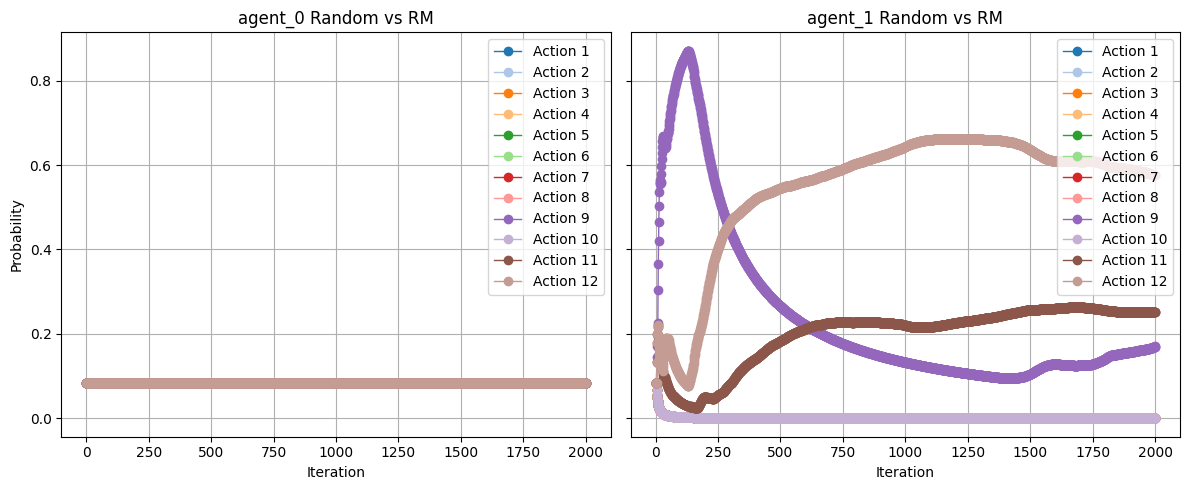

In [17]:
random_vs_rm_agents = {agents[0]: RandomAgent(game=game, agent=agents[0]),
                            agents[1]: RegretMatching(game=game, agent=agents[1], seed=1)}
policies, action_history = run_and_plot(random_vs_rm_agents, game, num_iterations=2000, title_suffix="Random vs RM")

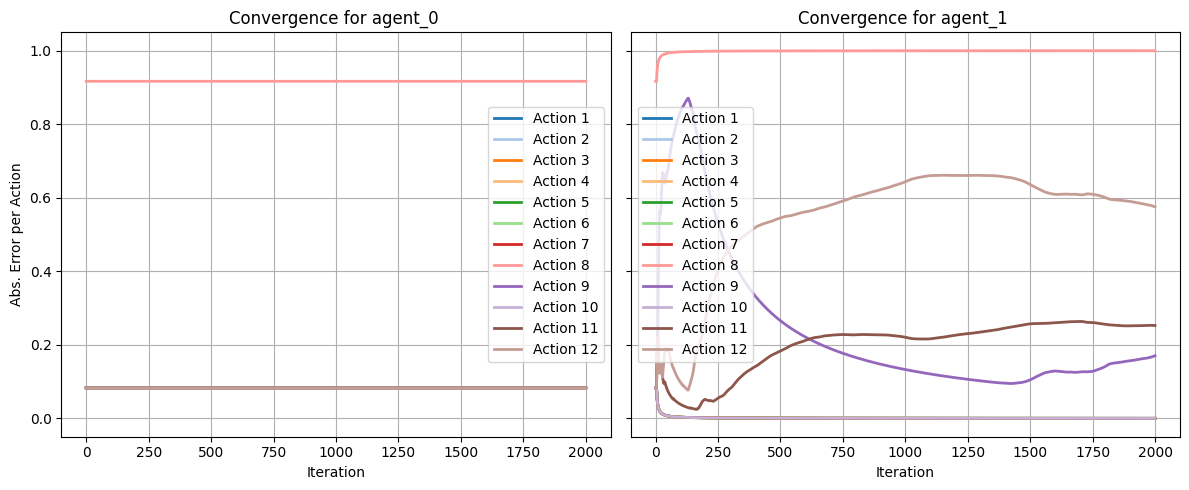

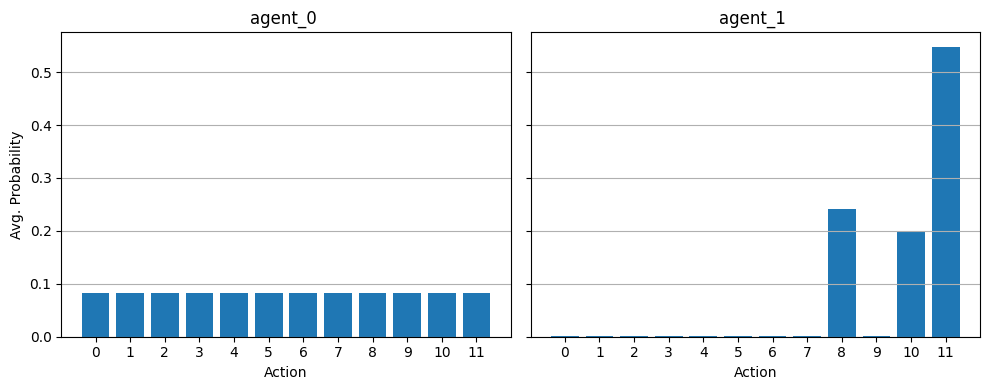

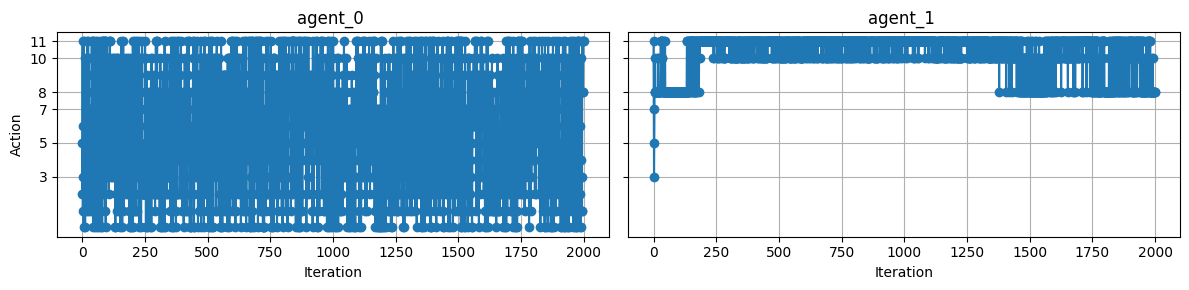

In [18]:
nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [19]:
for agent in random_vs_rm_agents:
    print(agent, random_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in random_vs_rm_agents:
    action = get_action_from_policy(random_vs_rm_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
agent_1 [4.93827160e-04 1.97530864e-03 9.87654321e-04 4.93827160e-04
 1.48148148e-03 9.87654321e-04 1.48148148e-03 4.93827160e-04
 9.03703704e-02 9.87654321e-04 8.14814815e-02 8.18765432e-01]
Action with high probability for agent_0: [1, 1, 10]
Action with high probability for agent_1: [4, 4, 4]


In [20]:
import numpy as np
from collections import defaultdict

# Todas las acciones posibles del juego
all_actions = [list(x) for x in game._moves]

def get_action_outcome(action1, action2):
    """
    Compara dos acciones y devuelve 'win', 'lose' o 'draw' dependiendo de 
    quién gana en al menos 2 de los 3 frentes.
    """
    wins = 0
    losses = 0

    for a1, a2 in zip(action1, action2):
        if a1 > a2:
            wins += 1
        elif a1 < a2:
            losses += 1

    if wins >= 2:
        return "win"
    elif losses >= 2:
        return "lose"
    else:
        return "draw"

# Diccionario para almacenar los resultados por acción
results_by_action = {}

for i, action in enumerate(all_actions):
    outcomes = [get_action_outcome(action, opponent)
                for j, opponent in enumerate(all_actions) if j != i]

    outcomes_count = {
        "win": outcomes.count("win"),
        "lose": outcomes.count("lose"),
        "draw": outcomes.count("draw")
    }

    total = len(outcomes)
    outcomes_percentage = {
        "win": f"{(outcomes_count['win'] / total) * 100:.1f}%",
        "draw": f"{(outcomes_count['draw'] / total) * 100:.1f}%",
        "lose": f"{(outcomes_count['lose'] / total) * 100:.1f}%"
    }

    results_by_action[tuple(action)] = {
        "index": i,
        "outcomes": outcomes_count,
        "percentages": outcomes_percentage
    }

# Imprimir resumen
for action, info in results_by_action.items():
    print(f"Action {info['index']} ({action}):")
    print(f"  Resultados: {info['outcomes']}")
    print(f"  Porcentajes: {info['percentages']}")
    print("-" * 40)


Action 0 ((1, 1, 10)):
  Resultados: {'win': 0, 'lose': 7, 'draw': 4}
  Porcentajes: {'win': '0.0%', 'draw': '36.4%', 'lose': '63.6%'}
----------------------------------------
Action 1 ((1, 2, 9)):
  Resultados: {'win': 0, 'lose': 6, 'draw': 5}
  Porcentajes: {'win': '0.0%', 'draw': '45.5%', 'lose': '54.5%'}
----------------------------------------
Action 2 ((1, 3, 8)):
  Resultados: {'win': 0, 'lose': 4, 'draw': 7}
  Porcentajes: {'win': '0.0%', 'draw': '63.6%', 'lose': '36.4%'}
----------------------------------------
Action 3 ((1, 4, 7)):
  Resultados: {'win': 1, 'lose': 2, 'draw': 8}
  Porcentajes: {'win': '9.1%', 'draw': '72.7%', 'lose': '18.2%'}
----------------------------------------
Action 4 ((1, 5, 6)):
  Resultados: {'win': 2, 'lose': 2, 'draw': 7}
  Porcentajes: {'win': '18.2%', 'draw': '63.6%', 'lose': '18.2%'}
----------------------------------------
Action 5 ((2, 2, 8)):
  Resultados: {'win': 3, 'lose': 3, 'draw': 5}
  Porcentajes: {'win': '27.3%', 'draw': '45.5%', 'lose